<a href="https://colab.research.google.com/github/Hari25483/Computer-Vision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import tensorflow as tf


In [3]:
# Set up image data generator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Set up the training and test data generators
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=42)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=True,
                                            seed=42)


Found 979 images belonging to 3 classes.
Found 170 images belonging to 3 classes.


In [4]:

# Set up the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

In [5]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 10,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

<ipython-input-5-8cdb512b8046>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/10
30/30 [==============================] - 515s 17s/step - loss: 1.0852 - accuracy: 0.4456 - val_loss: 1.0453 - val_accuracy: 0.5312
Epoch 2/10
30/30 [==============================] - 5s 182ms/step - loss: 0.9910 - accuracy: 0.5280 - val_loss: 0.9957 - val_accuracy: 0.4500
Epoch 3/10
30/30 [==============================] - 5s 155ms/step - loss: 0.9062 - accuracy: 0.5808 - val_loss: 0.9632 - val_accuracy: 0.6250
Epoch 4/10
30/30 [==============================] - 5s 168ms/step - loss: 0.8711 - accuracy: 0.6030 - val_loss: 0.8688 - val_accuracy: 0.5813
Epoch 5/10
30/30 [==============================] - 5s 160ms/step - loss: 0.7959 - accuracy: 0.6354 - val_loss: 0.8831 - val_accuracy: 0.6187
Epoch 6/10
30/30 [==============================] - 5s 180ms/step - loss: 0.7189 - accuracy: 0.6864 - val_loss: 0.8710 - val_accuracy: 0.6250
Epoch 7/10
30/30 [==============================] - 5s 182ms/step - loss: 0.6839 - accuracy: 0.7125 - val_loss: 0.8400 - val_accuracy: 0.6562
Epoch 

# Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions on test set
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(test_set.classes, y_pred)

6/6 [==============================] - 1s 131ms/step


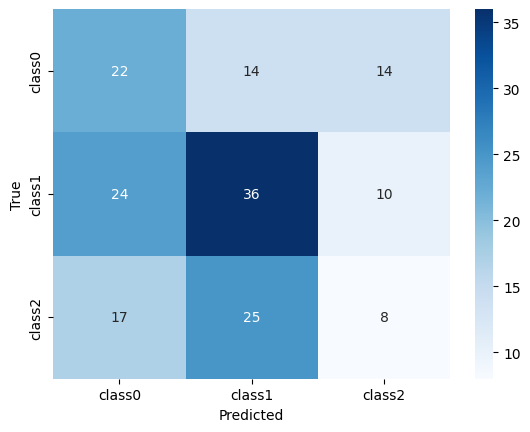

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap visualization
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['class0', 'class1', 'class2'], yticklabels=['class0', 'class1', 'class2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

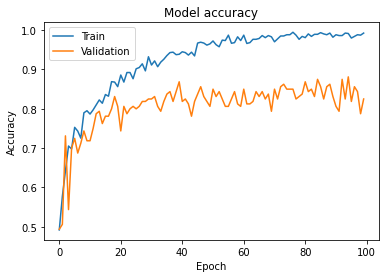

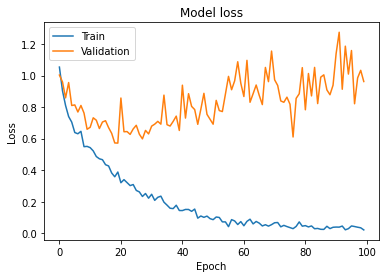

In [ ]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Save the model
model.save('CNN_Nail_model.h5')


In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/CNN_Nail_model.h5')


In [ ]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Testing/w.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())
print(class_labels)
# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 36ms/step
['black nail', 'white spot', 'yellow nail']
white spot


### Model2

In [ ]:
# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(units = 3, activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Compile the model
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model2.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 100,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/100


<ipython-input-18-1d4aea5b0c49>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(training_set,


30/30 [==============================] - 5s 134ms/step - loss: 1.1591 - accuracy: 0.4657 - val_loss: 0.9962 - val_accuracy: 0.5875
Epoch 2/100
30/30 [==============================] - 5s 151ms/step - loss: 0.8841 - accuracy: 0.5829 - val_loss: 0.9124 - val_accuracy: 0.5562
Epoch 3/100
30/30 [==============================] - 4s 134ms/step - loss: 0.7887 - accuracy: 0.6410 - val_loss: 0.8925 - val_accuracy: 0.6250
Epoch 4/100
30/30 [==============================] - 4s 137ms/step - loss: 0.7243 - accuracy: 0.7043 - val_loss: 0.7998 - val_accuracy: 0.6812
Epoch 5/100
30/30 [==============================] - 5s 151ms/step - loss: 0.7299 - accuracy: 0.6864 - val_loss: 0.8121 - val_accuracy: 0.6438
Epoch 6/100
30/30 [==============================] - 4s 142ms/step - loss: 0.6767 - accuracy: 0.7286 - val_loss: 0.7833 - val_accuracy: 0.7063
Epoch 7/100
30/30 [==============================] - 4s 134ms/step - loss: 0.6515 - accuracy: 0.7423 - val_loss: 0.6978 - val_accuracy: 0.7312
Epoch 8/100

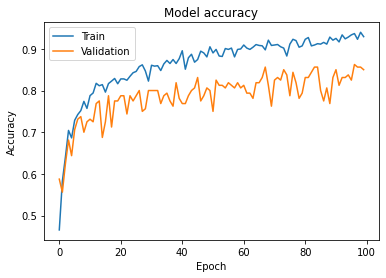

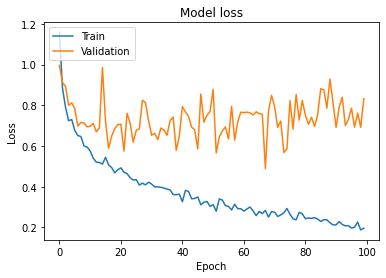

In [ ]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Save the model
model2.save('CNN_Nail_model_Dropout.h5')


In [ ]:
# Load the model
loaded_model2 = tf.keras.models.load_model('/content/CNN_Nail_model_Dropout.h5')


In [ ]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Testing/abc.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model2.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 62ms/step
black nail


### Model3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 3, activation = 'softmax'))
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Compile the model
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model3.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 100,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/100


<ipython-input-24-f5e57df17afe>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model3.fit_generator(training_set,


30/30 [==============================] - 7s 143ms/step - loss: 1.0964 - accuracy: 0.4477 - val_loss: 1.0860 - val_accuracy: 0.3938
Epoch 2/100
30/30 [==============================] - 4s 138ms/step - loss: 1.0329 - accuracy: 0.4667 - val_loss: 1.0695 - val_accuracy: 0.4625
Epoch 3/100
30/30 [==============================] - 4s 147ms/step - loss: 1.0013 - accuracy: 0.5290 - val_loss: 1.0567 - val_accuracy: 0.4500
Epoch 4/100
30/30 [==============================] - 5s 153ms/step - loss: 0.9333 - accuracy: 0.5554 - val_loss: 0.9975 - val_accuracy: 0.5375
Epoch 5/100
30/30 [==============================] - 4s 139ms/step - loss: 0.8719 - accuracy: 0.6177 - val_loss: 0.9446 - val_accuracy: 0.5875
Epoch 6/100
30/30 [==============================] - 5s 155ms/step - loss: 0.8198 - accuracy: 0.6367 - val_loss: 0.9884 - val_accuracy: 0.5750
Epoch 7/100
30/30 [==============================] - 4s 147ms/step - loss: 0.7806 - accuracy: 0.6505 - val_loss: 0.9468 - val_accuracy: 0.6000
Epoch 8/100

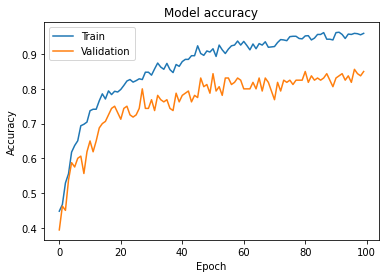

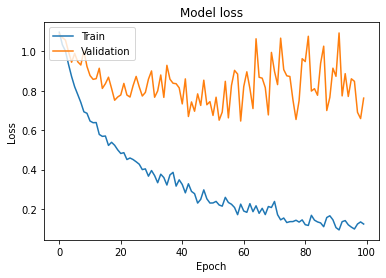

In [ ]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Save the model
model3.save('CNN_Nail_model3_VGG.h5')


In [ ]:
# Load the model
loaded_model3 = tf.keras.models.load_model('/content/CNN_Nail_model3_VGG.h5')


In [ ]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Testing/abc.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model3.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 141ms/step
black nail


### Model4

In [ ]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, Add,GlobalAveragePooling2D
from keras.models import Model

In [ ]:
from keras.layers import Add

inputs = Input(shape=(64, 64, 3))

x = Conv2D(32, 3, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

residual = x

x = Conv2D(32, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(32, 3, strides=1, padding='same')(x)
x = BatchNormalization()(x)

x = Add()([x, residual])
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
output = Dense(units = 3, activation = 'softmax')(x)

model4 = Model(inputs, output)
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
# Compile the model
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model to the training data
history = model4.fit_generator(training_set,
                    steps_per_epoch = training_set.samples // training_set.batch_size,
                    epochs = 100,
                    validation_data = test_set,
                    validation_steps = test_set.samples // test_set.batch_size,
                    verbose=1)

Epoch 1/100


<ipython-input-31-ebbcbf3ee466>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model4.fit_generator(training_set,


30/30 [==============================] - 7s 146ms/step - loss: 1.0309 - accuracy: 0.4784 - val_loss: 1.0876 - val_accuracy: 0.4125
Epoch 2/100
30/30 [==============================] - 4s 139ms/step - loss: 0.9491 - accuracy: 0.5428 - val_loss: 1.0795 - val_accuracy: 0.4187
Epoch 3/100
30/30 [==============================] - 4s 135ms/step - loss: 0.9250 - accuracy: 0.5660 - val_loss: 1.1062 - val_accuracy: 0.4187
Epoch 4/100
30/30 [==============================] - 5s 151ms/step - loss: 0.8713 - accuracy: 0.6241 - val_loss: 1.1993 - val_accuracy: 0.4125
Epoch 5/100
30/30 [==============================] - 4s 135ms/step - loss: 0.8806 - accuracy: 0.5861 - val_loss: 1.1365 - val_accuracy: 0.4187
Epoch 6/100
30/30 [==============================] - 5s 153ms/step - loss: 0.8623 - accuracy: 0.6177 - val_loss: 1.2197 - val_accuracy: 0.4187
Epoch 7/100
30/30 [==============================] - 4s 146ms/step - loss: 0.8479 - accuracy: 0.6188 - val_loss: 1.3413 - val_accuracy: 0.4125
Epoch 8/100

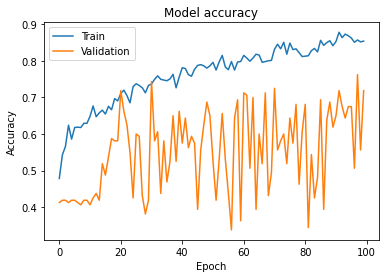

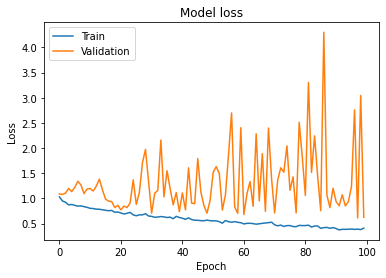

In [ ]:
import matplotlib.pyplot as plt

# Plot the training accuracy
plt.plot(history.history['accuracy'])
# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
# Plot the validation loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Save the model
model4.save('CNN_Nail_model4_ResNet.h5')


In [ ]:
# Load the model
loaded_model4 = tf.keras.models.load_model('/content/CNN_Nail_model4_ResNet.h5')


In [ ]:
# Predict image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Testing/abc.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model4.predict(test_image)

# Get class labels from the generator
class_labels = list(training_set.class_indices.keys())

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)



1/1 [==============================] - 0s 118ms/step
yellow nail


### API

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import tensorflow as tf


In [ ]:
# Predict image
from keras.preprocessing import image
loaded_model = tf.keras.models.load_model('/content/CNN_Nail_model.h5')
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Testing/y.jpg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
print(result)
# Get class labels from the generator
class_labels = ['black nail', 'white spot', 'yellow nail']


# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result[0])

# Get the label of the predicted class
predicted_class_label = class_labels[predicted_class_index]

# Get the index of the class with the
print(predicted_class_label)

1/1 [==============================] - 0s 59ms/step
[[2.9118092e-16 1.0000000e+00 8.1108318e-23]]
white spot


In [ ]:
!pip install -U flask-cors
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask,request, jsonify
from flask_ngrok import run_with_ngrok
# import pickle
from flask_cors import CORS, cross_origin
import cv2 as cv
# Predict image
from keras.preprocessing import image
loaded_model = tf.keras.models.load_model('/content/CNN_Nail_model.h5')
app = Flask(__name__)
CORS(app)
run_with_ngrok(app)


@app.route('/')
def index():
    return jsonify({"Hello":"Welcome"})

@app.route('/upload_image', methods=['POST'])
def upload_image():
    if 'image' in request.files:
        image = request.files['image']
        image.save(image.filename)
        test_image = tf.keras.utils.load_img(image.filename, target_size = (64, 64))
        test_image = tf.keras.utils.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = loaded_model.predict(test_image)
        print(result)
        # Get class labels from the generator
        class_labels = ['black nail', 'white spot', 'yellow nail']


        # Get the index of the class with the highest probability
        predicted_class_index = np.argmax(result[0])

        # Get the label of the predicted class
        predicted_class_label = class_labels[predicted_class_index]

        # Get the index of the class with the
        print(predicted_class_label)
        return jsonify(predicted_class_label)
        # Do something with the image here, such as saving it to disk or processing it with a machine learning model
    else:
        return 'No image in request'

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://2ec7-34-28-203-186.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
1/1 [==============================] - 0s 93ms/step


INFO:werkzeug:127.0.0.1 - - [27/Mar/2023 12:22:53] "POST /upload_image HTTP/1.1" 200 -


[[2.9118092e-16 1.0000000e+00 8.1108318e-23]]
white spot
